### 统计学：检验心理学现象

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

(1) 我们的自变量是什么？因变量是什么？

自变量：显示的文字与它们的打印颜色是否匹配

因变量：说出同等大小的列表中的墨色名称的时间

(2) 此任务的适当假设集是什么？

我要研究在两种不同的匹配条件下，参与者完成测试所需时间是否有显著性差异。我使用总体的参数$\mu_d$来代表总体的颜色词和打印颜色匹配情况下的用时减去颜色词和打印颜色不匹配情况下的用时的平均值，即其总体差值的平均值，我推测不匹配情况下用时会更多，要验证推测，则设置假设集为：

零假设（$H_0）: \mu_d \geq 0$ （即总体的颜色词与它们文字的打印颜色匹配的情况下说出墨色的时间大于或等于不匹配的情况下说出墨色的时间）

对立假设（$H_1）: \mu_d < 0$ （即总体的颜色词与它们文字的打印颜色匹配的情况下说出墨色的时间小于不匹配的情况下说出墨色的时间）

选择配对t检验对提出的假设进行检验。因为配对t检验的目的是检验相关或配对观测值之差的均值是否等于目标值，与我们上述匹配文字条件下与不匹配条件下差值的平均值是否大于等于或小于零的假设相一致，故选择配对t检验。因为此实验的样本为每位参与者在两种情况下完成测试的时间，参与者在匹配条件下用时长短会影响其在不匹配条件下的用时长短，故样本为相关样本，满足配对t检验中对相关样本的要求。该实验满足配对t检验的前置条件：1.自变量有两种取值，不同取值对应两组因变量数据，参与者之间相互独立。2.样本来自的两个总体服从正态分布。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
# 执行的分析
import pandas as pd

df = pd.read_csv('stroopdata.csv')
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


由上表可知，一致文字条件下的标准差为3.56，不一致文字条件下的标准差为4.80。一致文字条件下的最小值为8.63，最大值为22.33，极差为13.7，不一致文字条件下的最小值为15.69，最大值为35.26，极差为19.57。

一致文字条件下的平均值为14.05，不一致文字条件下的平均值为22.02。

(4) 显示样本数据分布的可视化。

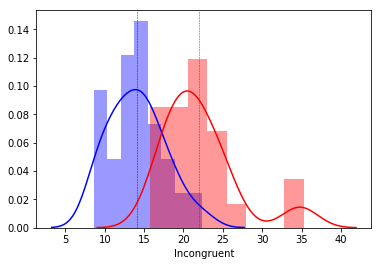

In [2]:
# 创建可视化图表
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.distplot(df['Congruent'],bins=8, color='blue')
plt.axvline(x=df['Congruent'].mean(), linewidth=.5, linestyle='dashed', color='blue')
sns.distplot(df['Incongruent'],bins=8, color='red')
plt.axvline(x=df['Incongruent'].mean(), linewidth=.5, linestyle='dashed', color='red')

由上图可知，一致条件和不一致条件下分布的形状大致相同，但是不一致条件下的分布相较于一致条件下整体右移，说明不一致条件下用时会更多，这与我的推测相同，但此时还不能下结论，需要进一步统计测试。

(5) 执行统计测试并报告结果。

In [3]:
# 执行统计检验
import scipy.stats as st

st.ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

In [6]:
# 计算自由度
n = len(df); n - 1

23

在置信水平95%，显著性水平α=0.05的情况下，执行统计检验所得p值为4.103000585711178e-08，小于α,拒绝原假设。在α = 0.05，自由度为23，单尾条件下，查表得t-critical = 1.714，执行统计检验所得的t-statistic为-8.02，|t-critical| < |t-statistic|，同样拒绝原假设。因此我们有足够的证据拒绝零假设接受对立假设，即颜色词与它们文字的打印颜色匹配的情况下说出墨色的时间小于不匹配的情况下说出墨色的时间。这与我的期望一致。